In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 梯度下降求解一元二次方程

$$
y = (x-2.5)^2 -1
$$

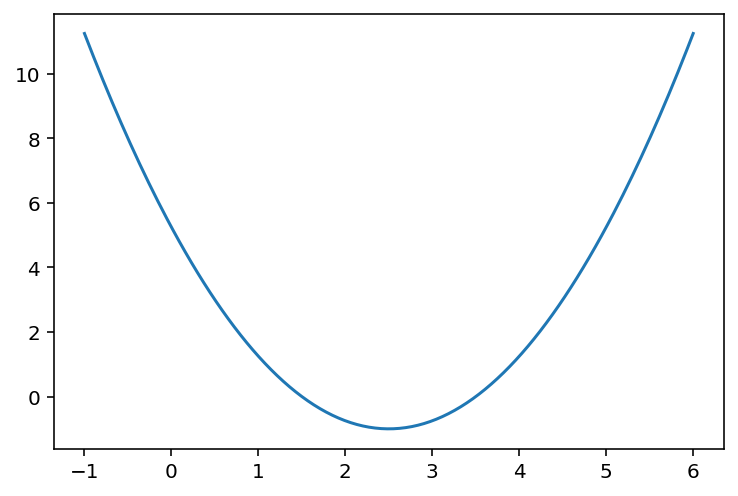

In [33]:
x = np.linspace(-1,6,200)
y = (x - 2.5)**2 - 1

plt.plot(x, y)
plt.show()

In [57]:
def j(theta):
    """一元二次方程"""
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf')

def dj(theta):
    """求导"""
    return 2 * (theta - 2.5)

def gradient_descent(theta=0.0, eta=0.01, epsilon=1e-8, max_iters=10000):
    """
    theta: 参数
    eta: 学习率
    epsilon: 最小值
    max_iters: 最大尝试次数
    """
    theta_history = [theta]
    while max_iters>0:
        gradient = dj(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if(abs(j(theta)-j(last_theta)) < epsilon):
            break
        max_iters -= 1
    print('theta: ', theta)
    print('min j(theta): ', j(theta))
    print('theta_history length: ', len(theta_history))
    plt.plot(x, y)
    plt.plot(np.array(theta_history), j(np.array(theta_history)), color="r", marker='+')
    plt.show()
    

theta:  2.4995140741236224
min j(theta):  -0.9999997638760426
theta_history length:  424


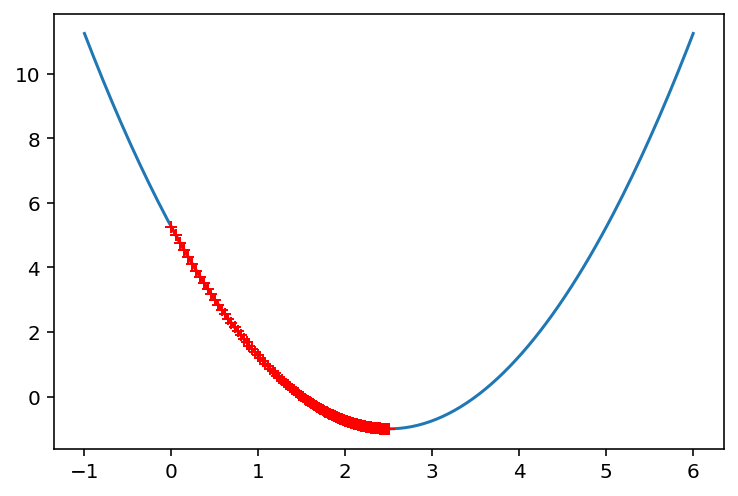

In [35]:
# 使用默认参数
gradient_descent()

theta:  2.4984243400819484
min j(theta):  -0.9999975172958226
theta_history length:  3682


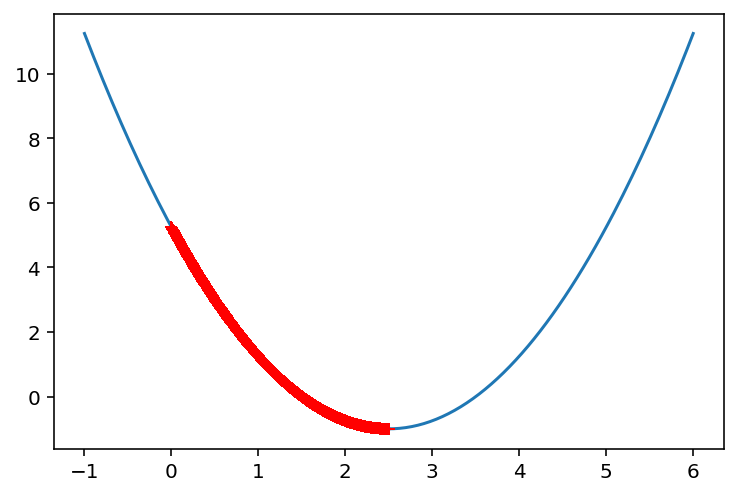

In [26]:
# 当学习率eta比较小时，下降的步子很小。程序需要循环很多次才会找到最小值。 一般学习率会设置为0.01
gradient_descent(eta=0.001)

theta:  2.500054842376601
min j(theta):  -0.9999999969923137
theta_history length:  22


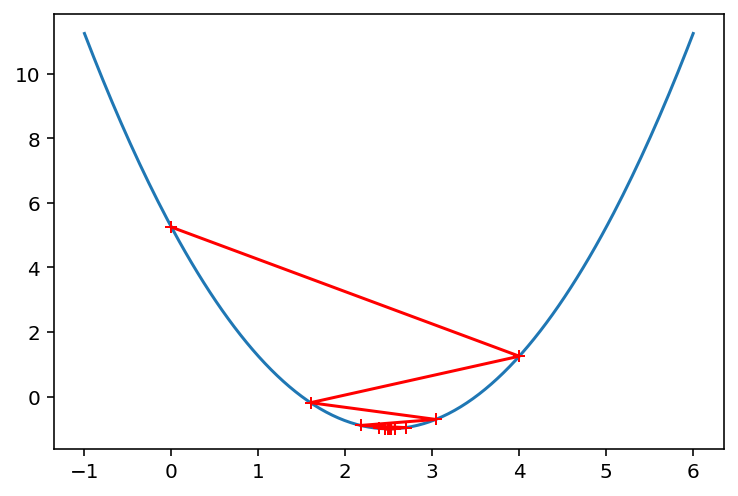

In [24]:
# 当学习率eta较大时候, theta跳到右边
gradient_descent(eta=0.8)

theta:  -8.183476519740352e+150
min j(theta):  6.696928794914166e+301
theta_history length:  501


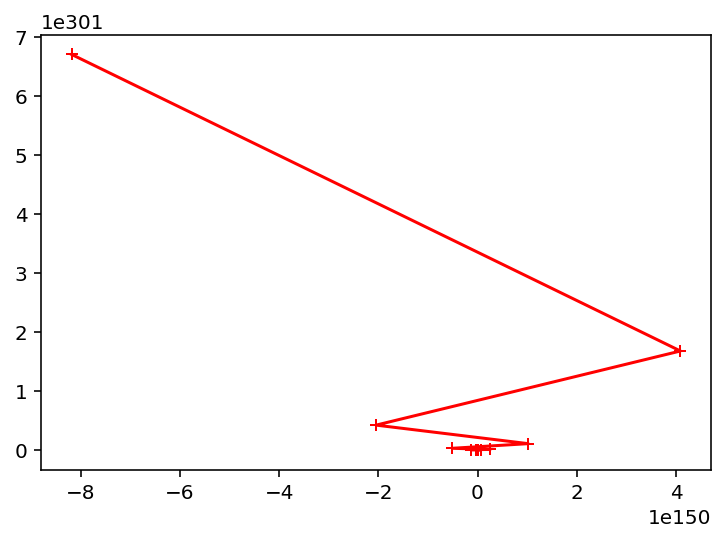

In [25]:
# 当特别大时，如1.5. 程序会陷入死循环, 所以限定递归次数为500
gradient_descent(eta=1.5, max_iters=500)

## 线性回归模型中使用梯度下降

损失函数:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}
$$

$$
\nabla J(\boldsymbol{\theta})
=
\left(\begin{array}{c}
\partial J / \partial_{\theta_{0}} \\
\partial J / \partial \theta_{1} \\
\partial J / \partial_{\theta_{2}} \\
\cdots \\
\partial J_{\partial \theta_{n}}
\end{array}\right)
=
\frac{2}{m} \cdot\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right.
$$


其中y的预测值:

$$
X_{b}=\left(\begin{array}{ccccc}
1 & X_{1}^{(1)} & X_{2}^{(1)} & \ldots & X_{n}^{(1)} \\
1 & X_{1}^{(2)} & X_{2}^{(2)} & \ldots & X_{n}^{(2)} \\
\ldots & & & & \ldots \\
1 & X_{1}^{(m)} & X_{2}^{(m)} & \ldots & X_{n}^{(m)}
\end{array}\right) \quad \theta=\left(\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\ldots \\
\theta_{n}
\end{array}\right)
$$

$$
\hat{y}=X_{b} \cdot \theta
$$



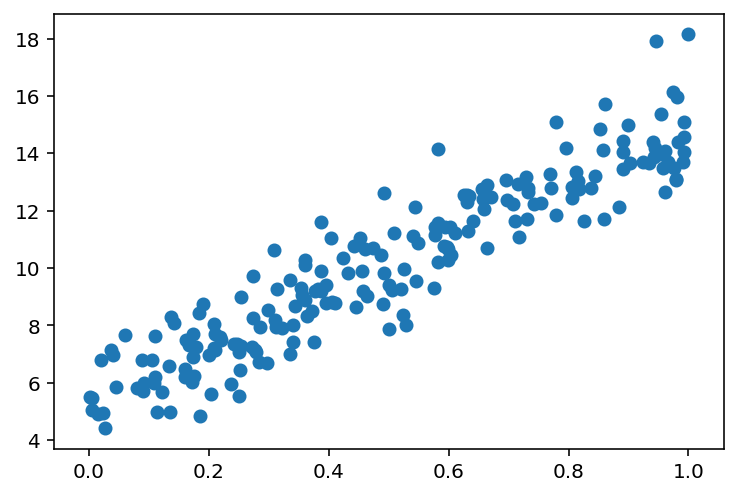

In [65]:
num_size = 200
np.random.seed(100)
# 1. np.random.random(size=num_size) 0-1的随机数； 2. np.random.normal(size=num_size) 正态分布
x = np.random.random(size=num_size)
# 函数 y=10x+5 然后设置一定的随机波动
y = 10 * x + 5 + np.random.normal(size=num_size) 

plt.scatter(x, y)

### 循环方式实现


In [82]:
class LinearRegressionGradientDescentCycle:
    def __init__(self):
        self._thetas = None
        # 截距
        self.intercept = None
        # 参数系数
        self.coefs = None

    def j(self, x, y, theta):
        """目标函数"""
        try:
            return np.sum(y - np.dot(x, theta)) ** 2 / len(x)
        except:
            # 当数据特别大，报错时，返回无穷大。
            return float('inf')

    def dj(self, x, y, thetas):
        """求导"""
        res = np.empty(len(thetas))
        # 第0个theta,其实就是截距
        res[0] = np.sum(np.dot(x, thetas) - y)
        for col in range(1, len(thetas)):
            res[col] = np.sum((np.dot(x, thetas) - y).dot(x[:, col]))

        return res * 2 / len(x)

    def gradient_descent(self, x, y, initial_thetas, eta=0.01, epsilon=1e-8, max_iters=1e4):
        """梯度下降"""
        thetas = initial_thetas
        while max_iters > 0:
            # 梯度gradient
            gradient = self.dj(x, y, thetas)
            last_thetas = thetas
            thetas = thetas - eta * gradient
            if(abs(self.j(x, y, thetas) - self.j(x, y, last_thetas)) < epsilon):
                break
            max_iters -= 1

        self._thetas = thetas
        self.intercept = thetas[0]
        self.coefs = thetas[1:]

    def fit(self, x_train, y_train, eta=0.01, epsilon=1e-8, max_iters=1e4):
        """训练"""
        # 将x转置加上一列全为1
        X_b = np.hstack([np.ones((len(x_train), 1)), x_train.reshape(-1, 1)])
        initial_thetas = np.zeros(X_b.shape[1])
        self.gradient_descent(X_b, y_train, initial_thetas, eta, epsilon, max_iters)

    def predict(self, x_predict):
        """预测"""
        X_b = np.hstack([np.ones((len(x_predict), 1)), x_predict.reshape(-1, 1)])
        return np.dot(X_b, self._thetas)

    @staticmethod
    def score(y, y_predict):
        """R评价"""
        return 1 - np.dot(y_predict - y, y_predict - y) / len(y) / np.var(y)


In [83]:
# 主函数    
linear = LinearRegressionGradientDescentCycle()
linear.fit(x, y)
predict_y = linear.predict(x)
print('coefs: ', linear.coefs)
print('intercept: ', linear.intercept)
print('score: ', linear.score(y, predict_y))
    

coefs:  [9.59680456]
intercept:  5.354074381583252
score:  0.8702405722560828


### 矢量计算

## 参考

- [Python3入门机器学习](https://github.com/liuyubobobo/Play-with-Machine-Learning-Algorithms)